In [1]:
from pipetorch.train import *
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [2]:
image_size = 64
batch_size = 64

In [3]:
transform=transforms.Compose([

  transforms.Resize((image_size, image_size)),  

  transforms.ToTensor(),

  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [4]:
# 设置训练数据集路径
train_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car-deployment_3\train_ds'

# 加载训练数据集
train_ds = torchvision.datasets.ImageFolder(
    train_ds_path,  # 训练集的路径
    transform=transform
)

# 设置验证数据集路径
valid_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car-deployment_3\valid_ds'

# 加载验证数据集
valid_ds = torchvision.datasets.ImageFolder(
    valid_ds_path,  # 验证集的路径
    transform=transform
)

In [5]:
train_dl = DataLoader(train_ds, batch_size=batch_size,shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=batch_size,shuffle=True, num_workers=2)

In [6]:
def demo_batch():
    real_batch = next(iter(train_dl))
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    showx(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True))

In [7]:
ds = train_dl.dataset

In [8]:
X, y = next(iter(train_dl))
X.shape

torch.Size([64, 3, 64, 64])

In [9]:
def showx(x):
    plt.imshow(np.transpose(x,(1,2,0)))

In [10]:
y.shape

torch.Size([64])

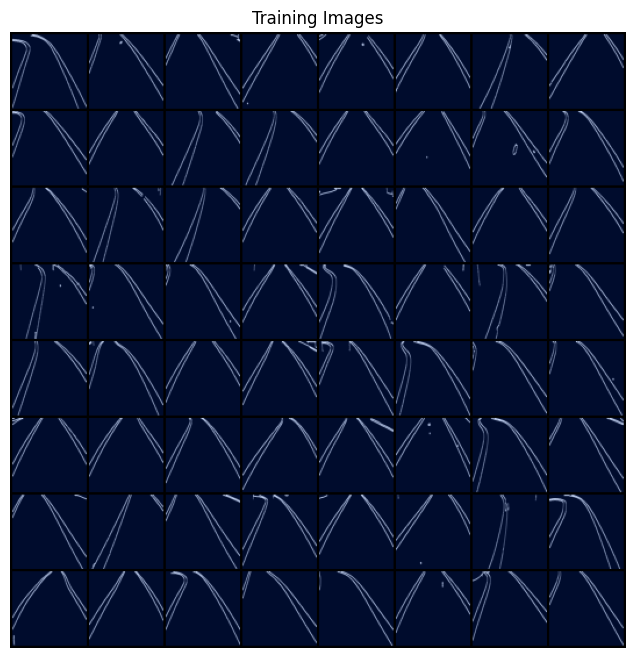

In [11]:
demo_batch()

In [70]:

def convnet3(image_size=64):
    return nn.Sequential(
        # 第一层卷积
        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 输入通道 3，输出通道 32
        nn.BatchNorm2d(32),  # 批归一化
        nn.ReLU(),  # 激活函数
        nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层
        
        # 第二层卷积
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 输入通道 32，输出通道 64
        nn.BatchNorm2d(64),  # 批归一化
        nn.ReLU(),  # 激活函数
        nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层
        
        # 第三层卷积
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # 输入通道 64，输出通道 128
        nn.BatchNorm2d(128),  # 批归一化
        nn.ReLU(),  # 激活函数
        nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层

        # 展平操作
        nn.Flatten(start_dim=1, end_dim=-1),  # 将 3D 特征图展平成 1D

        # 全连接层 1
        nn.Linear(128 * (image_size // 8) * (image_size // 8), 512),  # 根据输入图片大小调整形状
        nn.ReLU(),  # 激活函数
        
        # Dropout 层
        nn.Dropout(p=0.5),  # 丢弃比例为 50%

        # 全连接层 2
        nn.Linear(512, 128),  # 输出大小为 128
        nn.ReLU(),  # 激活函数
        
        # 输出层
        nn.Linear(128, 3)  # 假设分类为 3 类
    )

In [72]:
model = convnet3()

In [74]:
model.eval()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=8192, out_features=512, bias=True)
  (14): ReLU()
  (15): Dropout(p=0.5, inplace=False)
  (16): Linear(in_features=512, out_features=128, bias=True)


In [28]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [30]:
t.train(100, (1e-3, 1e-2), cycle=5)

Total:   0%|          | 0/14080 [00:00<?, ?it/s]

  5 24.46s trainloss=0.85558 validloss=1.01633 accuracy_score=0.46667 
 10 24.53s trainloss=0.73743 validloss=0.92174 accuracy_score=0.55000 
 15 25.82s trainloss=0.69014 validloss=0.86790 accuracy_score=0.57778 
 20 25.38s trainloss=0.61738 validloss=0.81470 accuracy_score=0.61667 
 25 25.33s trainloss=0.56870 validloss=0.75991 accuracy_score=0.65333 
 30 25.35s trainloss=0.53011 validloss=0.73371 accuracy_score=0.67778 
 35 25.87s trainloss=0.51318 validloss=0.69273 accuracy_score=0.70952 
 40 26.07s trainloss=0.48805 validloss=0.66540 accuracy_score=0.72917 
 45 25.87s trainloss=0.47589 validloss=0.64550 accuracy_score=0.74074 
 50 26.54s trainloss=0.45783 validloss=0.62926 accuracy_score=0.75000 
 55 25.79s trainloss=0.44170 validloss=0.61855 accuracy_score=0.76061 
 60 25.57s trainloss=0.42950 validloss=0.60851 accuracy_score=0.76667 
 65 29.14s trainloss=0.41757 validloss=0.59210 accuracy_score=0.77179 
 70 26.47s trainloss=0.40553 validloss=0.59196 accuracy_score=0.77857 
 75 25

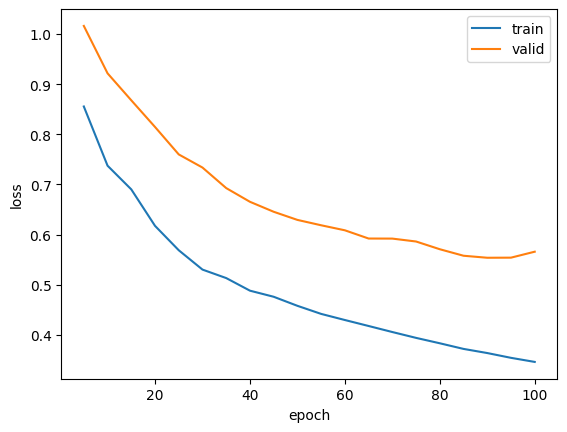

In [32]:
t.learning_curve()

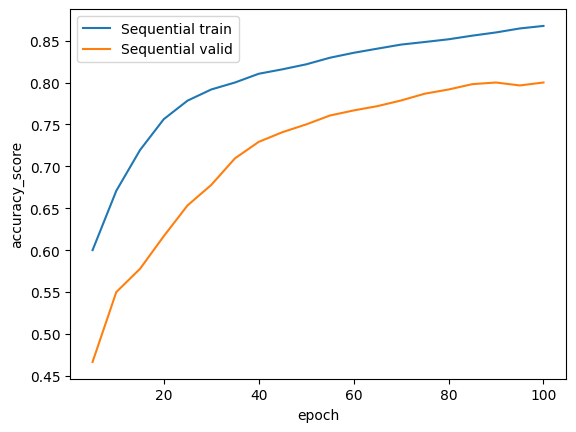

In [34]:
t.validation_curve()

In [76]:
def convnet4(image_size=64):
    return nn.Sequential(
        # 第一层卷积层，减少通道数
        nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),  # 输出：64x64x4
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：32x32x4

        # 第二层卷积层
        nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1),  # 输出：32x32x8
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：16x16x8

        # 第三层卷积层
        nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),  # 输出：16x16x16
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：8x8x16
        
        nn.Flatten(),  # Flatten the output

        # 全连接层
        nn.Linear(16 * 8 * 8, 128),  # 修改全连接层输入大小：16 * 8 * 8 = 1024
        nn.ReLU(),

        # Dropout 层，减少过拟合
        nn.Dropout(0.5),

        # 输出层
        nn.Linear(128, 3)  # 输出 3 个类别
    )

In [78]:
model = convnet4()

In [80]:
model.eval()

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=128, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=128, out_features=3, bias=True)
)

In [40]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t1 = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [42]:
t1.train(100, (1e-3, 1e-2), cycle=5)

Total:   0%|          | 0/14080 [00:00<?, ?it/s]

  5 24.04s trainloss=1.09482 validloss=1.09108 accuracy_score=0.43333 
 10 28.40s trainloss=1.09116 validloss=1.08513 accuracy_score=0.43333 
 15 27.93s trainloss=1.08729 validloss=1.08160 accuracy_score=0.43333 
 20 27.12s trainloss=1.08185 validloss=1.07264 accuracy_score=0.43333 
 25 26.75s trainloss=1.03183 validloss=1.01123 accuracy_score=0.50667 
 30 26.31s trainloss=0.94967 validloss=0.94507 accuracy_score=0.55000 
 35 26.68s trainloss=0.86101 validloss=0.88911 accuracy_score=0.59048 
 40 26.72s trainloss=0.79824 validloss=0.84515 accuracy_score=0.61667 
 45 26.27s trainloss=0.74718 validloss=0.80500 accuracy_score=0.64444 
 50 26.65s trainloss=0.70651 validloss=0.78201 accuracy_score=0.66333 
 55 26.74s trainloss=0.67048 validloss=0.75547 accuracy_score=0.68182 
 60 26.82s trainloss=0.63762 validloss=0.73477 accuracy_score=0.69722 
 65 29.59s trainloss=0.61027 validloss=0.72066 accuracy_score=0.71026 
 70 35.45s trainloss=0.58745 validloss=0.70424 accuracy_score=0.71905 
 75 39

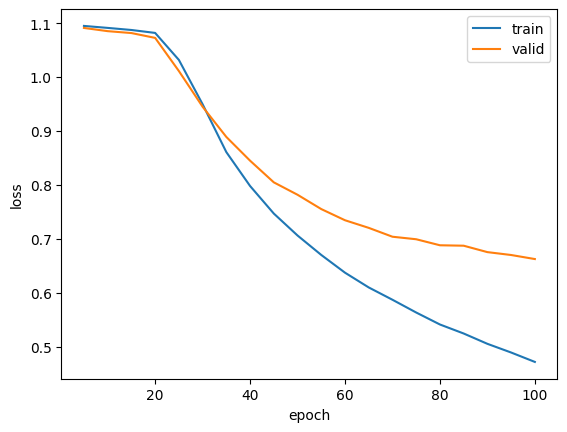

In [48]:
t1.learning_curve()

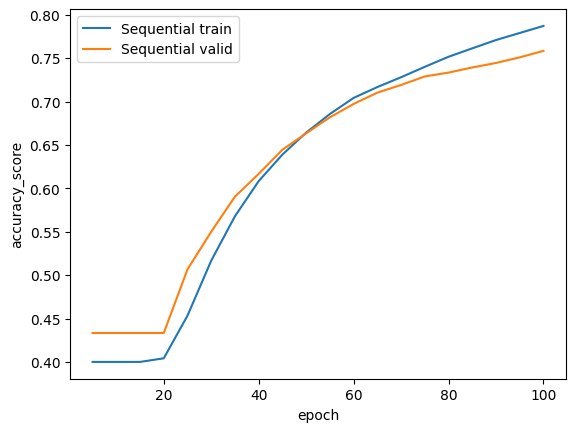

In [50]:
t1.validation_curve()

In [58]:
def convnet5(image_size=64):
    return nn.Sequential(
        # 第一层卷积层，减少通道数，增加 Batch Normalization
        nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),  # 输出：64x64x4
        nn.BatchNorm2d(4),  # Batch Normalization
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：32x32x4

        # 第二层卷积层，减少通道数，增加 Batch Normalization
        nn.Conv2d(4, 6, kernel_size=3, stride=1, padding=1),  # 输出：32x32x6
        nn.BatchNorm2d(6),  # Batch Normalization
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：16x16x6

        # 第三层卷积层，减少通道数，增加 Batch Normalization
        nn.Conv2d(6, 8, kernel_size=3, stride=1, padding=1),  # 输出：16x16x8
        nn.BatchNorm2d(8),  # Batch Normalization
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：8x8x8

        nn.Flatten(),  # Flatten the output

        # 全连接层，增加 Batch Normalization
        nn.Linear(8 * 8 * 8, 128),  # 修改全连接层输入大小：8 * 8 * 8 = 512
        nn.BatchNorm1d(128),  # Batch Normalization
        nn.ReLU(),

        # Dropout 层，减少过拟合
        nn.Dropout(0.5),

        # 输出层
        nn.Linear(128, 3)  # 输出 3 个类别
    )


In [60]:
model = convnet5()

In [62]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t2 = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [64]:
t2.train(100, (1e-3, 1e-2), cycle=5)

Total:   0%|          | 0/14080 [00:00<?, ?it/s]

  5 26.70s trainloss=0.30909 validloss=1.27481 accuracy_score=0.33333 
 10 26.90s trainloss=0.26112 validloss=1.32288 accuracy_score=0.43333 
 15 26.59s trainloss=0.21889 validloss=1.42900 accuracy_score=0.47778 
 20 26.85s trainloss=0.17303 validloss=1.35438 accuracy_score=0.49167 
 25 26.86s trainloss=0.14104 validloss=1.26979 accuracy_score=0.55333 
 30 26.60s trainloss=0.11820 validloss=1.18486 accuracy_score=0.58889 
 35 27.04s trainloss=0.10171 validloss=1.15625 accuracy_score=0.61905 
 40 26.83s trainloss=0.08922 validloss=1.13945 accuracy_score=0.62500 
 45 26.47s trainloss=0.07981 validloss=1.12717 accuracy_score=0.62963 
 50 29.07s trainloss=0.07197 validloss=1.12898 accuracy_score=0.64667 
 55 29.87s trainloss=0.06560 validloss=1.11495 accuracy_score=0.65152 
 60 27.65s trainloss=0.06030 validloss=1.11987 accuracy_score=0.65556 
 65 26.47s trainloss=0.05571 validloss=1.13738 accuracy_score=0.66410 
 70 26.97s trainloss=0.05178 validloss=1.13617 accuracy_score=0.67143 
 75 26

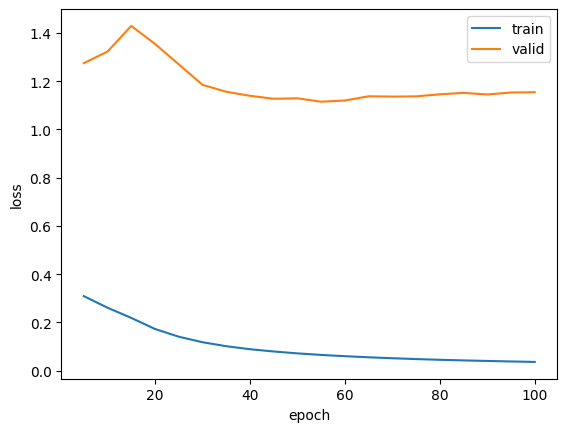

In [66]:
t2.learning_curve()

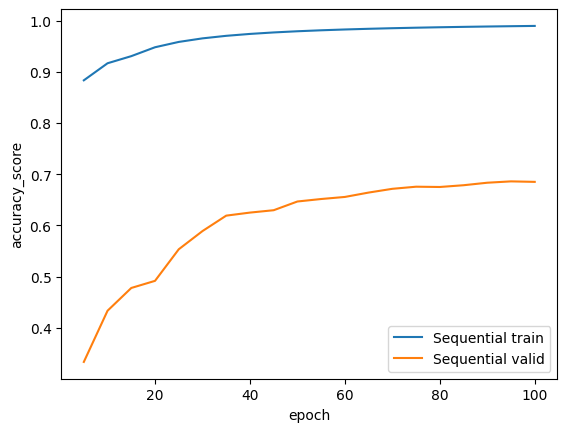

In [68]:
t2.validation_curve()

In [23]:
def convnet6(image_size=64):
    return nn.Sequential(
        # 第一层卷积层，减少通道数，增加 Batch Normalization
        nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),  # 输出：64x64x4
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：32x32x4

        # 第二层卷积层，减少通道数
        nn.Conv2d(4, 6, kernel_size=3, stride=1, padding=1),  # 输出：32x32x6
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：16x16x6

        # 第三层卷积层，减少通道数
        nn.Conv2d(6, 8, kernel_size=3, stride=1, padding=1),  # 输出：16x16x8
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),  # 输出：8x8x8

        nn.Flatten(),  # Flatten the output

        # 全连接层
        nn.Linear(8 * 8 * 8, 128),  # 修改全连接层输入大小：8 * 8 * 8 = 512
        nn.ReLU(),

        # Dropout 层，减少过拟合
        nn.Dropout(0.7),  # 增加 Dropout 比例

        # 输出层
        nn.Linear(128, 3)  # 输出 3 个类别
    )

In [25]:
model = convnet6()

In [27]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t3 = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [29]:
t3.train(200, (1e-3, 1e-2), cycle=5)

Total:   0%|          | 0/28160 [00:00<?, ?it/s]

  5 23.21s trainloss=1.07984 validloss=1.06374 accuracy_score=0.43333 
 10 23.92s trainloss=0.99790 validloss=1.02290 accuracy_score=0.46667 
 15 24.16s trainloss=0.88397 validloss=0.99163 accuracy_score=0.53333 
 20 23.98s trainloss=0.81197 validloss=0.93735 accuracy_score=0.58333 
 25 23.97s trainloss=0.77247 validloss=0.98895 accuracy_score=0.58667 
 30 23.61s trainloss=0.73450 validloss=0.95056 accuracy_score=0.59444 
 35 23.80s trainloss=0.70552 validloss=0.91001 accuracy_score=0.61905 
 40 24.19s trainloss=0.67788 validloss=0.87441 accuracy_score=0.64583 
 45 24.72s trainloss=0.66090 validloss=0.84659 accuracy_score=0.66296 
 50 24.24s trainloss=0.63427 validloss=0.82187 accuracy_score=0.67333 
 55 23.55s trainloss=0.60950 validloss=0.79845 accuracy_score=0.68788 
 60 26.33s trainloss=0.58907 validloss=0.77423 accuracy_score=0.69722 
 65 26.41s trainloss=0.57164 validloss=0.75563 accuracy_score=0.70256 
 70 26.17s trainloss=0.55457 validloss=0.73829 accuracy_score=0.71190 
 75 26

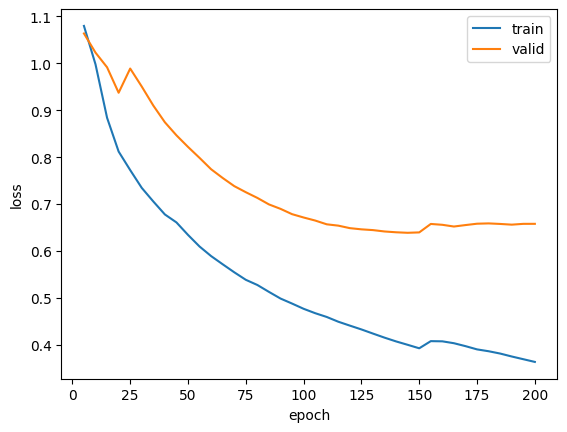

In [54]:
t3.learning_curve()

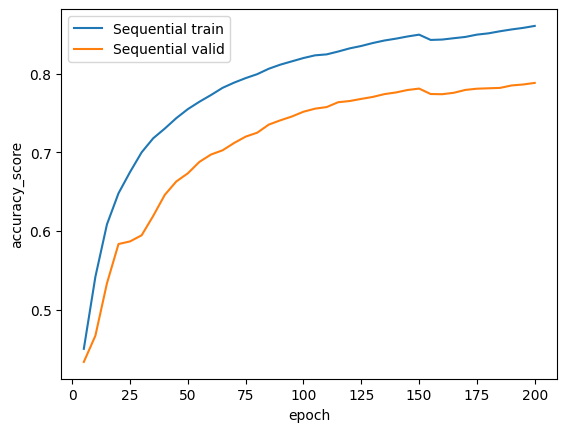

In [56]:
t3.validation_curve()

In [35]:
model = model.to('cpu')  # 如果模型在 GPU 上，转移到 CPU

In [37]:
model_weights = model.state_dict()

# 保存权重到文件
torch.save(model_weights, 'model_weights_3.pth')

In [45]:
print("Class to Index mapping:", train_ds.class_to_idx)


Class to Index mapping: {'left': 0, 'right': 1, 'straight': 2}
